#  Predicting İmdb Scores of Tv Shows and Movies in Netflix                  


Ahmet Göktuğ Özdemir

Capstone Project

December 2022

# Table of Contents


*   Summary
*   Motivation
* Literature Review
* Data Exploration & Codes
* Results
*   Referances



# Summary
 

  This project aims to make a algorithm that can predict a tv show or movies imdb score and if entry will get higher score than median score.The Internet Movie Database (IMDb) is an online database containing information and statistics about movies, TV shows and video games as well as actors, directors and other film industry professionals. İn this project dataset(1) was used which has all movies and tv shows from Netflix up to year 2021. Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, currently they have over 200M Subscribers globally. Dataset consist of 8807 rows and 12 columns. Project consist of data exploration, dataset preparation, making the algorithm and discussing results. At the moment it uses k-nn algorithm.     

# Motivation

 Currently Netflix is the biggest streaming service. I wanted to make something that could predict if something is worth my time. I used imdb rating as imdb scores are more reliable indicator of quality than Netflix's own scores. As for the reason I used only Netflix entrys I thought as Netflix is biggest streaming service their catalouge should be better than what is avaible in avarage and should be more known. With this I could know if something is good before it is released. I plan to use it for newly released titles rather than unreleased ones. This way before ratings are made I could decide if I should watch it or not.   

# Literature Review


One of the widely used classification algorithms is k-Nearest Neighbours (k-NN). Its popularity is mainly due to its simplicity, effectiveness, ease of implementation and ability to add new data in the training set at any time. However, one of its main drawbacks is the fact that its performance is highly dependent on the proper selection of parameter k, i.e. the number of nearest neighbours that the algorithm examines. The most frequently used technique for the “best” k determination is the cross validation as there is no general rule for choosing the k value due to its dependency on the training dataset. However, selecting a fixed k value throughout the dataset does not take into account its special features, like data distribution, class separation, imbalanced classes, sparse and dense neighborhoods and noisy subspaces(2)

As other researches indicates Netflix data set provides very little data for each movie -- only its title, the ratings
from the users and the date of the ratings -- so we use the Internet Movie Database 
for richer metadata. We also experimented with clustering sparser metadata like actors and
actresses. We then ran experiments on predicting ratings with and without the richer
metadata. We found that enriching that enriching our baseline collaborative filtering
approach with movie metadata only made a small improvement of 0.1% in the root mean
squared error (RMSE) of our predictions(3)

# Data Exploration & Codes

In [130]:
!pip install git+https://github.com/nielth/cinemagoer 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/nielth/cinemagoer to /tmp/pip-req-build-g76nbxtu
  Running command git clone -q https://github.com/nielth/cinemagoer /tmp/pip-req-build-g76nbxtu


We import our packages.

In [131]:
import http.client
import imdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imdb import Cinemagoer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sb
import nltk as nl
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix



In [132]:
def remove_suffix(input_string, suffix):
    if suffix and input_string.endswith(suffix):
        return input_string[:-len(suffix)]
    return input_string

Because getting data from imdb api takes too much time I worked with only 100 data for this time. For gettin all data from imdb takes up to 15 hours. By changing nrows we can use more of dataset.

In [133]:
pd.options.mode.chained_assignment=None

ia = Cinemagoer()

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

df = pd.read_csv("netflix_titles.csv",nrows=100)
print(df.head())

nullcheck=df.isnull()

  show_id     type                  title         director                                               cast        country          date_added  release_year rating   duration                                          listed_in                                        description
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson                                                NaN  United States  September 25, 2021          2020  PG-13     90 min                                      Documentaries  As her father nears the end of his life, filmm...
1      s2  TV Show          Blood & Water              NaN  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa  September 24, 2021          2021  TV-MA  2 Seasons    International TV Shows, TV Dramas, TV Mysteries  After crossing paths at a party, a Cape Town t...
2      s3  TV Show              Ganglands  Julien Leclercq  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN  September 24, 2021          2021  TV-

Showing null entry numbers.

show_id          0
type             0
title            0
director        38
cast            11
country         40
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64



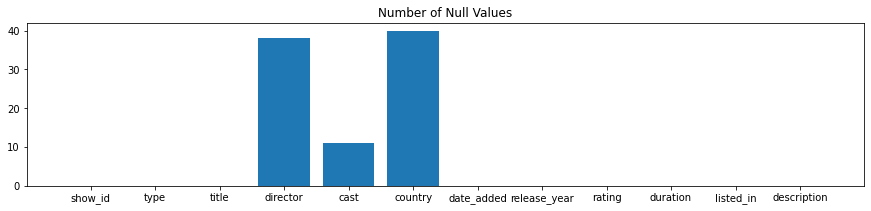

In [134]:
print(df.isna().sum())

y=df.isna().sum()
x =df.columns
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(3)
print()
plt.bar(x,y)
plt.title('Number of Null Values')
plt.show()

Getting missing values from imdb with cinemagoer api from imdb.

In [135]:
for i in range(len((nullcheck["director"]))):
    if (((nullcheck["director"][i])==True)):
        try:
            movies = ia.search_movie(df["title"][i])
            if (len(movies)>0):
                movieid = movies[0].movieID
                truemovie = ia.get_movie(movieid)
                director = []
                print(i)
                for j in range(len(truemovie["directors"])):
                    director.append(truemovie["directors"][j]["name"])
            else:
                print("Film does not exist in imdb")
        except KeyError:
                    print("No director entry in imdb")
                    if(df["type"][i]=="TV Show"):
                        print("It is a Tv Show")
                        director.append("Tv Show")
        except imdb._exceptions.IMDbParserError:
                    print("Invalid title")
        except imdb._exceptions.IMDbDataAccessError:
                    print("Timed out")
                    i = i - 1
        except http.client.IncompleteRead:
                    print("Incomplete Read")
                    i = i - 1
        s = ','.join(director)
        df.iloc[:, 3][i] = s

1
No director entry in imdb
It is a Tv Show
3
No director entry in imdb
It is a Tv Show
4
No director entry in imdb
It is a Tv Show
10
No director entry in imdb
It is a Tv Show
14
No director entry in imdb
It is a Tv Show
15
No director entry in imdb
It is a Tv Show
17
No director entry in imdb
It is a Tv Show
19
No director entry in imdb
It is a Tv Show
21
No director entry in imdb
It is a Tv Show
25
No director entry in imdb
It is a Tv Show
31
No director entry in imdb
It is a Tv Show
32
No director entry in imdb
It is a Tv Show
33
No director entry in imdb
It is a Tv Show
Film does not exist in imdb
37
39
No director entry in imdb
It is a Tv Show
40
No director entry in imdb
It is a Tv Show
49
50
No director entry in imdb
It is a Tv Show
55
No director entry in imdb
It is a Tv Show
65
No director entry in imdb
It is a Tv Show
66
No director entry in imdb
It is a Tv Show
67
No director entry in imdb
It is a Tv Show
69
No director entry in imdb
It is a Tv Show
70
No director entry in 

In [136]:
for i in range(len((nullcheck["country"]))):
    if (((nullcheck["country"][i])==True)):
        try:
            movies = ia.search_movie(df["title"][i])
            if (len(movies)>0):
                movieid = movies[0].movieID
                truemovie = ia.get_movie(movieid)
                country = []
                print(i)
                for j in range(len(truemovie["countries"])):
                    country.append(truemovie["countries"][j])
            else:
                print("Film does not exist in imdb")
            s = ','.join(country)
            df.iloc[:, 5][i] = s
        except KeyError:
                    print("No country entry in imdb")
        except imdb._exceptions.IMDbParserError:
                    print("Invalid title")
        except imdb._exceptions.IMDbDataAccessError:
                    print("Timed out")
                    i = i - 1
        except http.client.IncompleteRead:
                    print("Incomplete Read")
                    i = i - 1

2
3
5
6
10
11
13
14
16
18
19
20
22
23
26
30
31
33
Film does not exist in imdb
35
36
45
47
64
68
70
71
74
75
Film does not exist in imdb
78
79
80
83
85
86
87
88
89
No country entry in imdb
93


In [137]:
df.to_csv('complete_netflix_data.csv')
for i in range(len(df["cast"])):
    try:
        if (nullcheck["cast"][i])==True:
            movies = ia.search_movie(df["title"][i])
            if (len(movies)>0):
                movieid = movies[0].movieID
                truemovie = ia.get_movie(movieid)
                cast=[]
                print(i)
                for j in range(len(truemovie["cast"])):
                    cast.append(truemovie["cast"][j]["name"])
            else:
                print("Film does not exist in imdb")
            s = ','.join(cast)
            df.iloc[:, 4][i] = s
    except KeyError:
                print("No cast entry in imdb")
    except imdb._exceptions.IMDbParserError:
            print("Invalid title")
    except imdb._exceptions.IMDbDataAccessError:
            print("Timed out")
            i = i - 1
    except http.client.IncompleteRead:
            print("Incompleted Read")
            i = i - 1
df.to_csv('complete_netflix_data.csv')

0
3
No cast entry in imdb
10
14
16
20
45
66
69
74
91


In [138]:
score = []
for i in range(len((df["director"]))):
        try:
            movies = ia.search_movie(df["title"][i])
            if (len(movies)>0):
                movieid = movies[0].movieID
                truemovie = ia.get_movie(movieid)
                print(i)
                score.append(truemovie["rating"])
            else:
                print("Film does not exist in imdb")
                score.append(None)
        except KeyError:
                    print("No rating entry in imdb")
                    score.append(None)
        except imdb._exceptions.IMDbParserError:
                    print("Invalid title")
        except imdb._exceptions.IMDbDataAccessError:
                    print("Timed out")
                    i = i - 1
        except http.client.IncompleteRead:
                    print("Incomplete Read")
                    i = i - 1


df["Score"] = score


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
Film does not exist in imdb
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
Film does not exist in imdb
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


Showing remaining null values and dropping ones that could not be filled.

In [139]:
print("Null entry number:")
print(df.isna().sum())
print()
print("Drop null entrys")
df.dropna(inplace=True)

Null entry number:
show_id         0
type            0
title           0
director        0
cast            1
country         1
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
Score           2
dtype: int64

Drop null entrys


In [140]:
df.to_csv('complete_netflix_data.csv')

print(df.head())
print()
print()
print("Null entry number:")
print(df.isna().sum())
print()



  show_id     type                 title         director                                               cast        country          date_added  release_year rating   duration                                          listed_in                                        description  Score
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson  Michael Hilow,Ana Hoffman,Dick Johnson,Kirsten...  United States  September 25, 2021          2020  PG-13     90 min                                      Documentaries  As her father nears the end of his life, filmm...    7.4
1      s2  TV Show         Blood & Water          Tv Show  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa  September 24, 2021          2021  TV-MA  2 Seasons    International TV Shows, TV Dramas, TV Mysteries  After crossing paths at a party, a Cape Town t...    6.7
2      s3  TV Show             Ganglands  Julien Leclercq  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...         France  September 24, 2021  

Showing column types.

In [141]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       96 non-null     object 
 1   type          96 non-null     object 
 2   title         96 non-null     object 
 3   director      96 non-null     object 
 4   cast          96 non-null     object 
 5   country       96 non-null     object 
 6   date_added    96 non-null     object 
 7   release_year  96 non-null     int64  
 8   rating        96 non-null     object 
 9   duration      96 non-null     object 
 10  listed_in     96 non-null     object 
 11  description   96 non-null     object 
 12  Score         96 non-null     float64
dtypes: float64(1), int64(1), object(11)
memory usage: 10.5+ KB
None


In [142]:
print(df.describe())

       release_year      Score
count     96.000000  96.000000
mean    2014.916667   6.644792
std       10.327956   1.153381
min     1975.000000   3.000000
25%     2012.750000   5.800000
50%     2021.000000   6.700000
75%     2021.000000   7.400000
max     2021.000000   9.100000


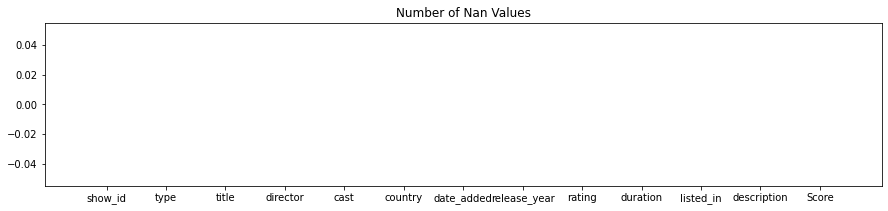

In [143]:
y=df.isna().sum()
print()
x =df.columns
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(3)
plt.bar(x,y)
plt.title('Number of Nan Values')
plt.show()
print()
print()

As we can see Netflix has more movies than Tv shows.

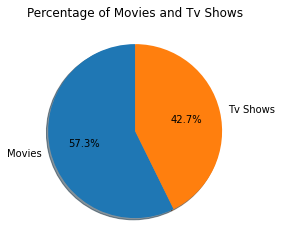

In [144]:
graph = [df['type'].value_counts()['Movie'], df['type'].value_counts()['TV Show']]
label = ["Movies", "Tv Shows"]
y = graph
plt.pie(y, labels=label,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Percentage of Movies and Tv Shows')
plt.show()
print()
print()

As seen in graphic united states has the most entrys.

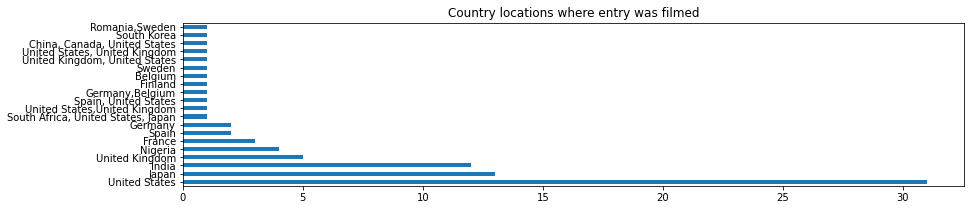

In [145]:
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(3)
df['country'].value_counts()[:20].plot(kind='barh')
plt.title('Country locations where entry was filmed')
plt.show()

Because Tv shows have no director entry in imdb I gave Tv show directors 'Tv Show' label. Because of this there seems to be a lot of tv shows in directors. After that we can see directors with most number of films.

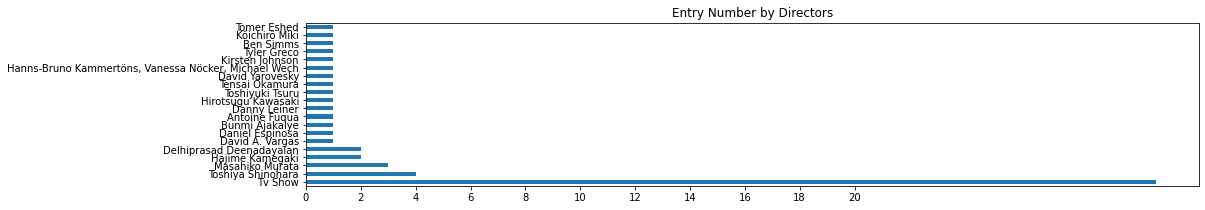

In [146]:
f = plt.figure()
df['director'].value_counts()[:20].plot(kind='barh')
f.set_figwidth(16)
f.set_figheight(3)
interval = range(0, 22, 2)
plt.xticks(interval)
plt.title('Entry Number by Directors')
plt.show()

Below is some histograms of different values.

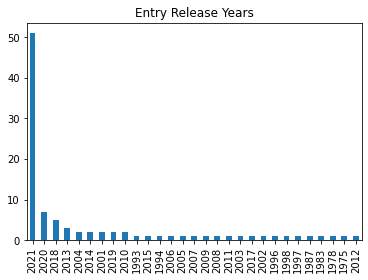

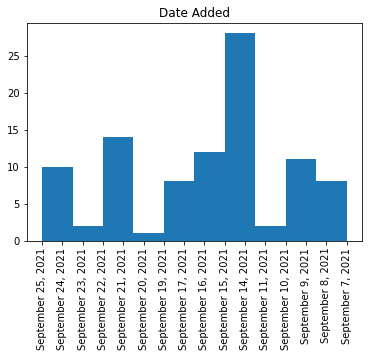

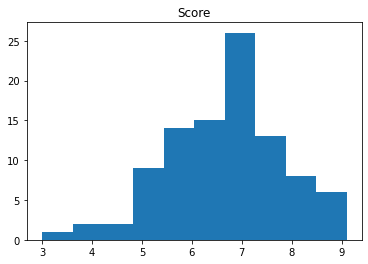

In [147]:
graph = df['release_year'].value_counts().plot.bar()
plt.title('Entry Release Years')
plt.show()


print()
print()

plt.hist(df["date_added"])
plt.xticks(rotation = 90)
plt.title('Date Added')
plt.show()

print()
print()

plt.hist(df["Score"])
plt.title('Score')
plt.show()

print()
print()

We can see the scores median and means.

In [148]:
print("Median Score")
print(df["Score"].median())
print("Mean Score")
print(df["Score"].agg('mean'))




df['director']=df['director'].astype('category')
df['country']=df['country'].astype('category')
df['cast']=df['cast'].astype('category')
df['listed_in']=df['listed_in'].astype('category')

df['type']=df['type'].astype('category')
df['rating']=df['rating'].astype('category')
df['release_year']=df['release_year'].astype('category')




Median Score
6.7
Mean Score
6.644791666666666


We use dummies to one hot encode our catagories. Reason we use dummies and not sklearn is we have multiple values in one cell.

In [149]:
df1 = df['listed_in'].str.get_dummies(',').add_prefix('listed_in_')
df2 = df['country'].str.get_dummies(',').add_prefix('country_')
df3 = df['cast'].str.get_dummies(',').add_prefix('cast_')
df4 = df['director'].str.get_dummies(',').add_prefix('director_')

df=df.drop(['cast','director','listed_in','country'], axis=1)
df = pd.concat([df, df1,df2,df3,df4], axis=1, join='inner')
df






show_id     type                                              title          date_added release_year rating   duration                                        description  Score  listed_in_ Anime Features  listed_in_ Classic Movies  listed_in_ Comedies  listed_in_ Crime TV Shows  listed_in_ Docuseries  listed_in_ Dramas  listed_in_ Horror Movies  listed_in_ Independent Movies  listed_in_ International Movies  listed_in_ International TV Shows  listed_in_ Kids' TV  listed_in_ Korean TV Shows  listed_in_ Music & Musicals  listed_in_ Reality TV  listed_in_ Romantic Movies  listed_in_ Romantic TV Shows  listed_in_ Sci-Fi & Fantasy  listed_in_ Spanish-Language TV Shows  listed_in_ Sports Movies  listed_in_ TV Action & Adventure  listed_in_ TV Comedies  listed_in_ TV Dramas  listed_in_ TV Horror  listed_in_ TV Mysteries  listed_in_ TV Sci-Fi & Fantasy  listed_in_ TV Thrillers  listed_in_ Thrillers  listed_in_Action & Adventure  listed_in_Anime Series  listed_in_British TV Shows  \
0       s1    Movie                               Dick Johnson Is Dead  September 25, 2021         2020  PG-13     90 min  As her father nears the end of his life, filmm...    7.4                          0                          0                    0                          0                      0                  0                         0                              0                                0                                  0                    0                           0                            0                      0                           0                             0                            0                                     0                         0                                 0                       0                     0                     0                        0                               0                        0                     0                             0                       0                           0   
1       s2  TV Show                                      Blood & Water  September 24, 2021         2021  TV-MA  2 Seasons  After crossing paths at a party, a Cape Town t...    6.7                          0                          0                    0                          0                      0                  0                         0                              0                                0                                  0                    0                           0                            0                      0                           0                             0                            0                                     0                         0                                 0                       0                     1                     0                        1                               0                        0                     0                             0                       0                           0   
2       s3  TV Show                                          Ganglands  September 24, 2021         2021  TV-MA   1 Season  To protect his family from a powerful drug lor...    7.0                          0                          0                    0                          0                      0                  0                         0                              0                                0                                  1                    0                           0                            0                      0                           0                             0                            0                                     0                         0                                 1                       0                     0                     0                        0                               0                        0                     0                             0                       0                           0   
4       s5  TV Show                

Because we have Tv shows and movies in same dataset some values are seasons and some are minutes. We can not work with that so we make all of them categorical by making minutes categorical.

In [150]:
for i in range(len(df['duration'])):
 try:
  if ('Seasons' in df['duration'][i]):
   print('Passed because its a Tv Show')
  elif('Season' in df['duration'][i]): 
   print('Passed because its a Tv Show')
  else:
    df['duration'][i]=remove_suffix(df['duration'][i],' min')
    print(df['duration'][i])
    number=int(df['duration'][i])
    if(number<70):
     df['duration'][i]='Shorter than a hour and ten minutes'  
    elif(number<150):
     df['duration'][i]='Between one or two and half hour'
    elif(number>120):
     df['duration'][i]='Longer than two and half hour'  
 except(KeyError):
  continue
df['duration']=df['duration'].astype('category')


90
Passed because its a Tv Show
Passed because its a Tv Show
Passed because its a Tv Show
Passed because its a Tv Show
91
125
Passed because its a Tv Show
104
Passed because its a Tv Show
Passed because its a Tv Show
127
91
Passed because its a Tv Show
Passed because its a Tv Show
67
Passed because its a Tv Show
94
Passed because its a Tv Show
Passed because its a Tv Show
Passed because its a Tv Show
161
61
166
Passed because its a Tv Show
147
103
97
106
111
Passed because its a Tv Show
Passed because its a Tv Show
Passed because its a Tv Show
110
105
Passed because its a Tv Show
96
Passed because its a Tv Show
Passed because its a Tv Show
124
116
98
91
23
115
Passed because its a Tv Show
122
Passed because its a Tv Show
Passed because its a Tv Show
99
99
88
100
Passed because its a Tv Show
102
93
96
95
85
97
95
83
103
Passed because its a Tv Show
Passed because its a Tv Show
Passed because its a Tv Show
113
Passed because its a Tv Show
Passed because its a Tv Show
13
Passed because it

We visualize the change.

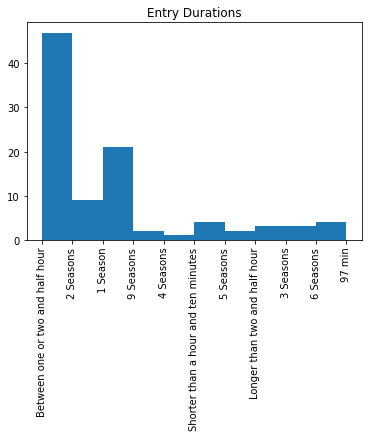

In [151]:
plt.hist(df["duration"])
plt.title('Entry Durations')
plt.xticks(rotation = 90)
plt.show()


We use one hot encoding to make other values categorical.

In [152]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['type','release_year','rating','duration']),remainder='passthrough',sparse_threshold=0)

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out()
)

transformed_df.columns = transformed_df.columns.str.replace("onehotencoder__", " ")

transformed_df.columns = transformed_df.columns.str.replace("remainder__", " ")


Because we have too much columns we drop ones with less than 5 occurrence so we can work with our data better.

In [153]:
vec = CountVectorizer(stop_words='english')
X1 = vec.fit_transform(transformed_df[" title"]) 
count_array = X1.toarray() 
X1 = pd.DataFrame(data=count_array,columns = vec.get_feature_names_out())
for (columnName, columnData) in X1.iteritems():
  if(X1[columnName].sum()<5):
    X1=X1.drop([columnName],axis=1)
transformed_df = pd.concat([transformed_df,X1], axis=1, join='inner') 
transformed_df=transformed_df.drop([' title'],axis=1) 
transformed_df=transformed_df.drop([' date_added'],axis=1) 
transformed_df=transformed_df.drop([' show_id'],axis=1)

We tokenize the description and get values which has more than 5 occurrences.

In [154]:
X2 = vec.fit_transform(transformed_df[" description"]) 
count_array = X2.toarray() 
X2 = pd.DataFrame(data=count_array,columns = vec.get_feature_names_out())
for (columnName, columnData) in X2.iteritems():
  if(X2[columnName].sum()<5):
    X2=X2.drop([columnName],axis=1)
transformed_df = pd.concat([transformed_df,X1], axis=1, join='inner') 
transformed_df=transformed_df.drop([' description'],axis=1) 

In [155]:
score=transformed_df[" Score"]
transformed_df=transformed_df.drop([' Score'],axis=1)
transformed_df["score"] = score

In [156]:
for (columnName, columnData) in transformed_df.iteritems():
  if(type(columnData.values[0])==int or type(columnData.values[0])==float):
    if(columnData.values[0]==1 or columnData.values[0]==0):
        if(transformed_df[columnName].value_counts()[1]<5):
          transformed_df=transformed_df.drop([columnName],axis=1)


In [157]:
transformed_df.head()

type_Movie  type_TV Show  release_year_2018  release_year_2020  release_year_2021  rating_PG  rating_PG-13  rating_TV-14  rating_TV-MA  rating_TV-PG  rating_TV-Y  rating_TV-Y7  duration_1 Season  duration_2 Seasons  duration_Between one or two and half hour  listed_in_ Anime Features  listed_in_ Dramas  listed_in_ International Movies  listed_in_ International TV Shows  listed_in_ TV Comedies  listed_in_ TV Dramas  listed_in_ Thrillers  listed_in_Action & Adventure  listed_in_British TV Shows  listed_in_Children & Family Movies  listed_in_Comedies  listed_in_Crime TV Shows  listed_in_Documentaries  listed_in_Dramas  listed_in_International TV Shows  listed_in_Kids' TV  country_ United States  country_India  country_Japan  country_United Kingdom  country_United States  cast_ Chie Nakamura  cast_ Houko Kuwashima  cast_ Kazuhiko Inoue  cast_ Showtaro Morikubo  cast_Junko Takeuchi  director_Tv Show  movie  naruto  movie  naruto score
0         1.0           0.0                0.0                1.0                0.0        0.0           1.0           0.0           0.0           0.0          0.0           0.0                0.0                 0.0                                        1.0                          0                  0                                0                                  0                       0                     0                     0                             0                           0                                   0                   0                         0                        1                 0                                 0                   0                       0              0              0                       0                      1                    0                      0                     0                        0                    0                 0      0       0      0       0   7.4
1         0.0           1.0                0.0                0.0                1.0        0.0           0.0           0.0           1.0           0.0          0.0           0.0                0.0                 1.0                                        0.0                          0                  0                                0                                  0                       0                     1                     0                             0                           0                                   0                   0                         0                        0                 0                                 1                   0                       0              0              0                       0                      0                    0                      0                     0                        0                    0                 1      0       0      0       0   6.7
2         0.0           1.0                0.0                0.0                1.0        0.0           0.0           0.0           1.0           0.0          0.0           0.0                1.0                 0.0                                        0.0                          0                  0                                0                                  1                       0                     0                     0                             0                           0                                   0                   0                         1                        0                 0                                 0                   0                       0              0              0                       0                      0                    0                      0                     0                        0                    0                 0      0       0      0       0   7.0
3         0.0           1.0                0.0                0.0                1.0        0.0           0.0           0.0           1.0           0.0          0.0           0.0                0.0                 1

In [158]:
transformed_df.describe()

movie     naruto      movie     naruto
count  96.000000  96.000000  96.000000  96.000000
mean    0.125000   0.083333   0.125000   0.083333
std     0.332455   0.277836   0.332455   0.277836
min     0.000000   0.000000   0.000000   0.000000
25%     0.000000   0.000000   0.000000   0.000000
50%     0.000000   0.000000   0.000000   0.000000
75%     0.000000   0.000000   0.000000   0.000000
max     1.000000   1.000000   1.000000   1.000000

As we can see we don't have much correlation with anything.

In [159]:
transformed_df.astype('float64').corr()


type_Movie   type_TV Show   release_year_2018   release_year_2020   release_year_2021   rating_PG   rating_PG-13   rating_TV-14   rating_TV-MA   rating_TV-PG   rating_TV-Y   rating_TV-Y7   duration_1 Season   duration_2 Seasons   duration_Between one or two and half hour   listed_in_ Anime Features   listed_in_ Dramas   listed_in_ International Movies   listed_in_ International TV Shows   listed_in_ TV Comedies   listed_in_ TV Dramas   listed_in_ Thrillers   listed_in_Action & Adventure   listed_in_British TV Shows   listed_in_Children & Family Movies   listed_in_Comedies   listed_in_Crime TV Shows   listed_in_Documentaries   listed_in_Dramas   listed_in_International TV Shows   listed_in_Kids' TV   country_ United States   country_India   country_Japan   country_United Kingdom   country_United States   cast_ Chie Nakamura   cast_ Houko Kuwashima   cast_ Kazuhiko Inoue   cast_ Showtaro Morikubo   cast_Junko Takeuchi   director_Tv Show  \
 type_Movie                                    1.000000      -1.000000            0.012834           -0.000844           -0.346827    0.222928       0.260324       0.069530      -0.327593       0.124695     -0.081941      -0.212054           -0.612870            -0.372521                                    0.845593                    0.326333            0.242139                          0.540092                           -0.372521                -0.324821              -0.416655               0.242139                       0.442913                    -0.271490                             0.260324             0.242139                  -0.299050                  0.242139       2.603240e-01                          -0.416655            -0.324821                 0.107609   -5.571546e-02        0.280154                -0.273023            5.981000e-02              0.260324                0.202383               0.222928                  0.107609              0.260324          -0.799859   
 type_TV Show                                 -1.000000       1.000000           -0.012834            0.000844            0.346827   -0.222928      -0.260324      -0.069530       0.327593      -0.124695      0.081941       0.212054            0.612870             0.372521                                   -0.845593                   -0.326333           -0.242139                         -0.540092                            0.372521                 0.324821               0.416655              -0.242139                      -0.442913                     0.271490                            -0.260324            -0.242139                   0.299050                 -0.242139      -2.603240e-01                           0.416655             0.324821                -0.107609    5.571546e-02       -0.280154                 0.273023           -5.981000e-02             -0.260324               -0.202383              -0.222928                 -0.107609             -0.260324           0.799859   
 release_year_2018                             0.012834      -0.012834            1.000000           -0.065738           -0.249542    0.133150      -0.070675       0.014072       0.033150      -0.108736     -0.054945       0.133150           -0.010632            -0.075392                                   -0.135788                   -0.088596           -0.065738                         -0.042360                           -0.075392                 0.114572               0.062860              -0.065738                      -0.120247                    -0.054945                             0.098945            -0.065738                  -0.060523                  0.114572       9.894549e-02                           0.062860             0.114572                 0.156044   -8.859624e-02       -0.092768                 0.098945           -8.473185e-02             -0.070675               -0.054945              -0.060523                 -0.054945             -0.070675          -0.061618   
 release_year_2020                            -0.000844  

For us to make classification we need a new column. We make a column of if a entry has higher or lower than median score. 

In [160]:
cl=[]
for i in range(len(transformed_df['score'])):
 try:
  if ( transformed_df['score'][i]>6.5 ):
   cl.append('Higher than median')
  elif(transformed_df['score'][i]<=6.5): 
   cl.append('Lower than median')  
 except(KeyError):
  continue
transformed_df['Class']=cl
transformed_df

type_Movie  type_TV Show  release_year_2018  release_year_2020  release_year_2021  rating_PG  rating_PG-13  rating_TV-14  rating_TV-MA  rating_TV-PG  rating_TV-Y  rating_TV-Y7  duration_1 Season  duration_2 Seasons  duration_Between one or two and half hour  listed_in_ Anime Features  listed_in_ Dramas  listed_in_ International Movies  listed_in_ International TV Shows  listed_in_ TV Comedies  listed_in_ TV Dramas  listed_in_ Thrillers  listed_in_Action & Adventure  listed_in_British TV Shows  listed_in_Children & Family Movies  listed_in_Comedies  listed_in_Crime TV Shows  listed_in_Documentaries  listed_in_Dramas  listed_in_International TV Shows  listed_in_Kids' TV  country_ United States  country_India  country_Japan  country_United Kingdom  country_United States  cast_ Chie Nakamura  cast_ Houko Kuwashima  cast_ Kazuhiko Inoue  cast_ Showtaro Morikubo  cast_Junko Takeuchi  director_Tv Show  movie  naruto  movie  naruto score               Class
0          1.0           0.0                0.0                1.0                0.0        0.0           1.0           0.0           0.0           0.0          0.0           0.0                0.0                 0.0                                        1.0                          0                  0                                0                                  0                       0                     0                     0                             0                           0                                   0                   0                         0                        1                 0                                 0                   0                       0              0              0                       0                      1                    0                      0                     0                        0                    0                 0      0       0      0       0   7.4  Higher than median
1          0.0           1.0                0.0                0.0                1.0        0.0           0.0           0.0           1.0           0.0          0.0           0.0                0.0                 1.0                                        0.0                          0                  0                                0                                  0                       0                     1                     0                             0                           0                                   0                   0                         0                        0                 0                                 1                   0                       0              0              0                       0                      0                    0                      0                     0                        0                    0                 1      0       0      0       0   6.7  Higher than median
2          0.0           1.0                0.0                0.0                1.0        0.0           0.0           0.0           1.0           0.0          0.0           0.0                1.0                 0.0                                        0.0                          0                  0                                0                                  1                       0                     0                     0                             0                           0                                   0                   0                         1                        0                 0                                 0                   0                       0              0              0                       0                      0                    0                      0                     0                        0                    0                 0      0       0      0       0   7.0  Higher than median
3          0.0           1.0                0.0                0.0                1.0        0.0           0.0           0.0        

We use label encoder and train test split to split and prepare our data.

In [161]:
le = preprocessing.LabelEncoder()
encoded=le.fit_transform(transformed_df['Class'])
transformed_df=transformed_df.drop(['Class'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(transformed_df,encoded,test_size=0.3,random_state=25) 




In [162]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)


Fitting 10 folds for each of 30 candidates, totalling 300 fits


As seen our accuracy for classification is high.

In [163]:
y_test_hat=grid_search.predict(X_test) 

test_accuracy=accuracy_score(y_test,y_test_hat)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 79.31%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


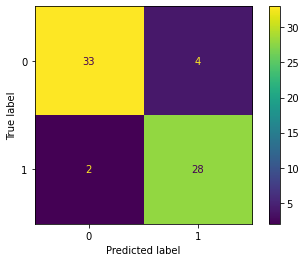

In [164]:
plot_confusion_matrix(grid,X_train, y_train,values_format='d' )


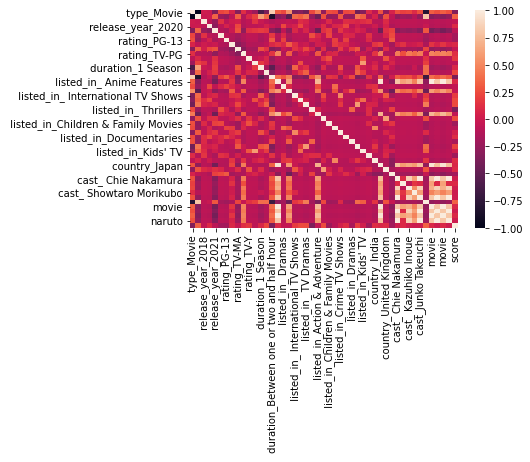

In [165]:
sb.heatmap(transformed_df.astype('float64').corr())
score = transformed_df['score']
transformed_df=transformed_df.drop(['score'],axis=1)

In [166]:
score=score.astype(int)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(transformed_df, score, random_state = 25,test_size=0.30)
X_train.head()


type_Movie  type_TV Show  release_year_2018  release_year_2020  release_year_2021  rating_PG  rating_PG-13  rating_TV-14  rating_TV-MA  rating_TV-PG  rating_TV-Y  rating_TV-Y7  duration_1 Season  duration_2 Seasons  duration_Between one or two and half hour  listed_in_ Anime Features  listed_in_ Dramas  listed_in_ International Movies  listed_in_ International TV Shows  listed_in_ TV Comedies  listed_in_ TV Dramas  listed_in_ Thrillers  listed_in_Action & Adventure  listed_in_British TV Shows  listed_in_Children & Family Movies  listed_in_Comedies  listed_in_Crime TV Shows  listed_in_Documentaries  listed_in_Dramas  listed_in_International TV Shows  listed_in_Kids' TV  country_ United States  country_India  country_Japan  country_United Kingdom  country_United States  cast_ Chie Nakamura  cast_ Houko Kuwashima  cast_ Kazuhiko Inoue  cast_ Showtaro Morikubo  cast_Junko Takeuchi  director_Tv Show  movie  naruto  movie  naruto
92         1.0           0.0                1.0                0.0                0.0        0.0           0.0           0.0           1.0           0.0          0.0           0.0                0.0                 0.0                                        0.0                          0                  0                                0                                  0                       0                     0                     0                             0                           0                                   0                   0                         0                        1                 0                                 0                   0                       0              0              0                       0                      1                    0                      0                     0                        0                    0                 0      0       0      0       0
41         1.0           0.0                0.0                0.0                0.0        1.0           0.0           0.0           0.0           0.0          0.0           0.0                0.0                 0.0                                        1.0                          0                  0                                0                                  0                       0                     0                     1                             1                           0                                   0                   0                         0                        0                 0                                 0                   0                       0              0              0                       0                      1                    0                      0                     0                        0                    0                 0      0       0      0       0
53         0.0           1.0                0.0                0.0                1.0        0.0           0.0           0.0           0.0           1.0          0.0           0.0                0.0                 0.0                                        0.0                          0                  0                                0                                  0                       0                     0                     0                             0                           0                                   0                   0                         0                        0                 0                                 0                   0                       0              0              0                       0                      1                    0                      0                     0                        0                    0                 1      0       0      0       0
7          0.0           1.0                0.0                0.0                1.0        0.0           0.0           1.0           0.0           0.0          0.0           0.0                0.0                 0.0                  

In [168]:
print(X_test.head())
print()
print()
print(y_train.head())


    type_Movie  type_TV Show  release_year_2018  release_year_2020  release_year_2021  rating_PG  rating_PG-13  rating_TV-14  rating_TV-MA  rating_TV-PG  rating_TV-Y  rating_TV-Y7  duration_1 Season  duration_2 Seasons  duration_Between one or two and half hour  listed_in_ Anime Features  listed_in_ Dramas  listed_in_ International Movies  listed_in_ International TV Shows  listed_in_ TV Comedies  listed_in_ TV Dramas  listed_in_ Thrillers  listed_in_Action & Adventure  listed_in_British TV Shows  listed_in_Children & Family Movies  listed_in_Comedies  listed_in_Crime TV Shows  listed_in_Documentaries  listed_in_Dramas  listed_in_International TV Shows  listed_in_Kids' TV  country_ United States  country_India  country_Japan  country_United Kingdom  country_United States  cast_ Chie Nakamura  cast_ Houko Kuwashima  cast_ Kazuhiko Inoue  cast_ Showtaro Morikubo  cast_Junko Takeuchi  director_Tv Show  movie  naruto  movie  naruto
52         1.0           0.0                0.0           

We try to make a regression prediction too.

In [169]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler.fit_transform(X_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
x_test = pd.DataFrame(x_test_scaled)

In [170]:
knn = KNeighborsRegressor()
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(knn, grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [171]:
g_res.best_score_

0.02823997430689018

In [172]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'distance'}

As seen our data in current state can not make accurate predictions.

In [173]:
print(g_res.score(X_test, y_test))
scores = cross_val_score(knn, transformed_df, score, cv =5)
print()
print()
print('Model accuracy: ',np.mean(scores))

0.11317334204763707


Model accuracy:  0.09678274964941644


# Results

  As seen from our results we can accurately predict if something is better than avarage but we can not predict precise scores. This means we need a different dataset or columns. 
  We can use this as it is for some predictions and we can select what is worth our time.

# References


1.   https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download
2.   Dynamic k determination in k-NN classifier: A literature review
3.  Netflix Movie Rating Prediction using Enriched Movie Metadata


